# Project with Python: Student Performance in Exams with an exploratory data analysis

this project is taken on the dataset https://www.kaggle.com/datasets/spscientist/students-performance-in-exams with a further exploration data analysis  method approach to determine the influence of students on exam performance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
student = pd.read_csv('/content/StudentsPerformance.csv')
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


do a data summary to find out the dataset

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
student.duplicated().sum()

0

melakukan analisis data lebih lanjut tentang stundent

In [ ]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


dari data tersebut menunjukan bahwa masih terdapat nilai tertinggi dan terendah dari masing masing latar belakang pendidikan orang tua yang berbeda-beda maka dari itu explorasi untuk mengetahui pengaruh ujian siswa terhadap performa diantaranya:

1. Latar pendidikan apa yang paling banyak mengikuti ujian tersebut dan paling sedikit yang mengikuti ujian tersebut?

2. tunjukan 10 student yang mendapatkan nilai rendah pada ujian math , reading, wiriting?

3. tunjukan 10 student yang mendapatkan nilai tertinggi pada ujian math , reading, wiriting?

4. latar pendidikan apa yang mendapatkan nilai terendah dan tertinggi dari rata-rata total score yang diperoleh?

5. siapa saja yang mendapatkan score tertinggi dari masing masing grup race/ethnicity pada latar belakang pendidikan orang tua

6. kategori apa yang paling banyak diminati student pada colom lunch?

7. apakah ada pengaruh antara stundent yang mengikuti test preparation course dengan tidak mengikuti test terhadap total score yang di raih?

8. apakah ada pengaruh pada latar belakang pendidikan orangtua terhadap total score yang di raih?


## 1. Latar pendidikan apa yang paling banyak mengikuti ujian tersebut dan paling sedikit yang mengikuti ujian tersebut?



> dengan menggunakan fungsi `.value_counts()` untuk mengetahui jumlah dari masing-masing kategori

> lalu menggunakan visualisasi`sns.countplot()` untuk melihat pada kategori apa yang paling banyak mengikuti ujian




In [ ]:
# mengetahui banyak latar belakang pendidikan yang mengikuti ujian
student['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

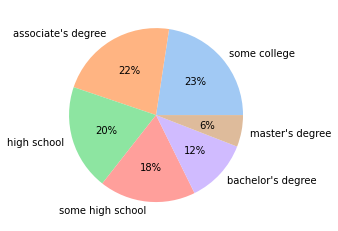

In [ ]:
colors = sns.color_palette('pastel')
plt.pie(student['parental level of education'].value_counts(), 
        labels=student['parental level of education'].value_counts().index, colors=colors,
        autopct='%.0f%%')
plt.show()

pada hasil diatas bahwa student yang paling banyak mengikuti ujian pada dari latar belakang orang tua **some college** lebih banyak dengan jumlah **student 226 dengan presentase 23%** yang mengikuti ujian

dan pada student pada dari orang tua berlatar belakang **master's degree** paling sedikit yang mengikuti ujian tersebut dengan jumlah **student 59 dengan preentase 6%**

## 2. tunjukan 10 student yang mendapatkan nilai rendah pada ujian math , reading, wiriting?

* untuk mengetahui 10 student terendah pada masing masing ujian disini melakukan penjumlahan score pada categori `math score`	`reading score`	`writing score` dengan kolom `total score`
* disini menggunakan variabel `student_low_score` untuk mengurutkan score dari yang terendah ke tinggi dengan menggunakan fungsi `.sort_values('total score', ascending= True)`

* dilanjutkan dengan menggunakan fungsi `.head(10)` untuk melihat 10 kolom teratas pada variabel `student_low_score`

In [3]:
#membuat kolom total score dengan menjumlahkan score dari masing masing ujian
student['total score'] = student['math score'] + student['reading score'] + student['writing score']

student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [ ]:
student_low_score = student.sort_values('total score', ascending= True)
student_low_score.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
59,female,group C,some high school,free/reduced,none,0,17,10,27
980,female,group B,high school,free/reduced,none,8,24,23,55
596,male,group B,high school,free/reduced,none,30,24,15,69
327,male,group A,some college,free/reduced,none,28,23,19,70
76,male,group E,some high school,standard,none,30,26,22,78
17,female,group B,some high school,free/reduced,none,18,32,28,78
601,female,group C,high school,standard,none,29,29,30,88
787,female,group B,some college,standard,none,19,38,32,89
338,female,group B,some high school,free/reduced,none,24,38,27,89
211,male,group C,some college,free/reduced,none,35,28,27,90


## 3. tunjukan 10 student yang mendapatkan nilai tertinggi pada ujian math , reading, wiriting?



1. disini menggunakan variabel `student_high_score` melakukan pengurutan  kolom`'total score'` dari nilai tertinggi ke rendah dengan fungsi `.sort_values()`dimana parameter dari kolom `'total score'`, `ascending= False`

2.  dilanjutkan dengan fungsi `.head(10)` untuk melihat 10 kolom teratas dari variabel `student_high_score`





In [ ]:
student_high_score = student.sort_values('total score', ascending=False)
student_high_score.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
712,female,group D,some college,standard,none,98,100,99,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293


## 4. latar pendidikan apa yang mendapatkan nilai terendah dan tertinggi dari rata-rata total score yang di peroleh?



1.   untuk mendapatkan nilai rata-rata dari total score pada latar belakang pendidikan disini dilakukan aggregation dengan mengunakan fungsi `.groupby()` pada kolom `parental level of education` dengan mengaggregasi kolom `total score`
menjadi kolom `avg_score` yang diambil dari rata-rata`total score` dengan menggunakan fungsi `mean()`dari masing-masing latar belakang pendidikan
2.   Item daftar



In [ ]:
education_score = student.groupby('parental level of education').agg(
    avg_score = ('total score','mean')
).reset_index()

education_score

,parental level of education,avg_score
0,associate's degree,208.707207
1,bachelor's degree,215.771186
2,high school,189.290816
3,master's degree,220.796610
4,some college,205.429204
5,some high school,195.324022


dilihat dari rata-rata latar belakang pendidikan orang tua student dengan level pendidikan **master's degree** memiliki **rata-rata score tertinggi 220,796**

sedangkan rata-rata latar belakang pendidikan orang tua, student dengan level pendidikan **high school** memiliki **rata-rata score terendah 189,290**

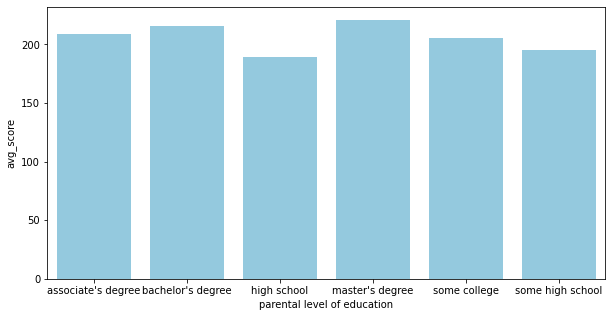

In [ ]:
# menvisualisasikan dengan barplot
plt.figure(figsize=(10, 5))
sns.barplot(x ='parental level of education',y='avg_score',data=education_score ,color='skyblue')

## 5. siapa saja yang mendapatkan score tertinggi dari masing masing grup `race/ethnicity` pada latar belakang pendidikan orang tua

untuk mengetahui nilai tertinggi dari masing-masing grup digunakan fungsi .grupby dengan aggregasi kolom total score

In [ ]:
group_score = student.groupby(['race/ethnicity','parental level of education']).agg(
    avg_score = ('total score','mean')
).reset_index()

group_score[group_score['race/ethnicity']=='group A']

,race/ethnicity,parental level of education,avg_score
0,group A,associate's degree,191.642857
1,group A,bachelor's degree,203.583333
2,group A,high school,183.833333
3,group A,master's degree,190.000000
4,group A,some college,194.666667
5,group A,some high school,179.583333


In [ ]:
group_score[group_score['race/ethnicity']=='group B']

,race/ethnicity,parental level of education,avg_score
6,group B,associate's degree,203.926829
7,group B,bachelor's degree,213.900000
8,group B,high school,184.500000
9,group B,master's degree,224.500000
10,group B,some college,193.135135
11,group B,some high school,192.868421


In [ ]:
group_score[group_score['race/ethnicity']=='group C']

,race/ethnicity,parental level of education,avg_score
12,group C,associate's degree,208.128205
13,group C,bachelor's degree,219.725000
14,group C,high school,186.984375
15,group C,master's degree,207.105263
16,group C,some college,203.420290
17,group C,some high school,189.469388


In [ ]:
group_score[group_score['race/ethnicity']=='group D']

,race/ethnicity,parental level of education,avg_score
18,group D,associate's degree,208.000000
19,group D,bachelor's degree,209.607143
20,group D,high school,190.431818
21,group D,master's degree,229.434783
22,group D,some college,211.313433
23,group D,some high school,205.840000


In [ ]:
group_score[group_score['race/ethnicity']=='group E']

,race/ethnicity,parental level of education,avg_score
24,group E,associate's degree,221.923077
25,group E,bachelor's degree,226.777778
26,group E,high school,208.636364
27,group E,master's degree,237.250000
28,group E,some college,216.657143
29,group E,some high school,208.222222


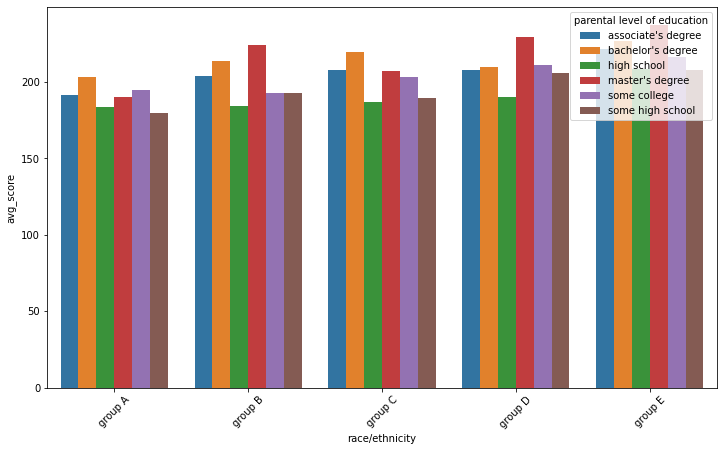

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = "race/ethnicity", y = "avg_score", hue = "parental level of education",
            data = group_score)
plt.xticks(rotation=45)
plt.show()

pada diagram diatas bahwa nilai rata rata tertinggi pada masing-masing grup berdasarkan latar belakang penidikan orang tua diantaranya

1. **grup A** dengan pendidikan **bachelor's degree** memiliki nilai rata-rata tertinggi dengan **total rata-rata score 203.583**
2. **grup B** dengan pendidikan **master's degree** memiliki nilai rata-rata tertinggi **total rata-rata score 224.5**
3. **grup C** dengan pendidikan **bachelor's degree** memiliki nilai rata-rata tertinggi **total rata-rata score 219.725**
4. **grup D** dengan pendidikan **master's degree** memiliki nilai rata-rata tertinggi **total rata-rata score 229.434**
5. **grup E** dengan pendidikan **master's degree** memiliki nilai rata-rata tertinggi **total rata-rata score 237.25**

## 6. kategori apa yang paling banyak diminati student pada colom `lunch`?

In [4]:
# untuk mengetahui jumlah terbanyak pada kategori lunch
student['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

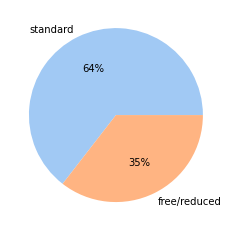

In [8]:
#mengvisualisasikan kategori lunch
colors = sns.color_palette('pastel')
plt.pie(student['lunch'].value_counts(), 
        labels=student['lunch'].value_counts().index, colors=colors,
        autopct='%.0f%%')
plt.show()

pada diagram diatas menunjukan bahwa student yang memilih makan siang pada posisi standar memiliki jumlah terbanyak **sebanyak 645 siswa atau 64%**

## 7. apakah ada pengaruh antara stundent yang mengikuti `test preparation course` dengan tidak mengikuti test terhadap total score yang di raih?

untuk mengetahui pengaruh pada `test preparation course` maka dilakukan beberapa tahapan yang diantaranya:
1. berapa jumlah peserta yang mengikuti test sebelum mengikuti ujian?
2. berapa jumlah maksimal total score pada peserta ujian yang mengikuti test sebelum ujian dan berapa yang tidak mengikuti tersebut?
3. siapakah yang memiliki rata-rata tertinggi dari peserta yang mengikuti test pada ujian dan yang tidak mengikuti test?
4. apa saja dari latar belakang pendidikan orangtua yang paling banyak mengikuti test sebelum ujian dan yang tidak mengikuti ujian?


In [6]:
#jumlah student yang mengikuti test sebelum mengikuti ujian

student['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

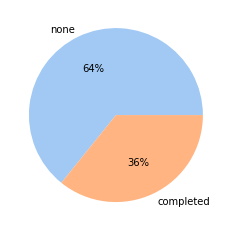

In [9]:
#mengvisualisasikan kategori lunch
colors = sns.color_palette('pastel')
plt.pie(student['test preparation course'].value_counts(), 
        labels=student['test preparation course'].value_counts().index, colors=colors,
        autopct='%.0f%%')
plt.show()

pada diagram diatas menujukan bahwa student yang `complited` pada colom `test preparation course` memiliki **jumlah 358 atau 36%** dari jumlah siswa yang mengikuti ujian 

In [14]:
## mengetahui total score tertinggi dari jumlah siswa yang mengikuti test
test_score = student.groupby(['test preparation course']).agg(
    max_score = ('total score', 'max'),
    avg_score = ('total score', 'mean')
).reset_index()

test_score

,test preparation course,max_score,avg_score
0,completed,300,218.008380
1,none,300,195.116822


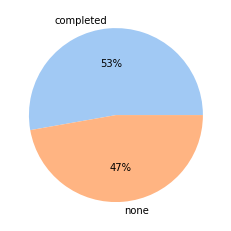

In [17]:
colors = sns.color_palette('pastel')
plt.pie(test_score['avg_score'], 
        labels=test_score['test preparation course'], colors=colors,
        autopct='%.0f%%')
plt.show()

pada `test preparation course` pada kedua kategori yang melakukan test dengan tidak melakukan test memiliki nilai maksimal sama dengan total score 300

dan untuk rata-rata total score tertinggi pada categori `complited` memiliki rata-rata **218,008 atau 53 % lebih tinggi nilai rata-rata score**

In [19]:
test_score = student.groupby(['test preparation course', 'parental level of education']).agg(
    count_education = ('parental level of education','count'),
    max_score = ('total score', 'max'),
    avg_score = ('total score', 'mean')
).reset_index()

test_score

,test preparation course,parental level of education,count_education,max_score,avg_score
0,completed,associate's degree,82,293,224.817073
1,completed,bachelor's degree,46,300,228.717391
2,completed,high school,56,287,200.892857
3,completed,master's degree,20,293,228.950000
4,completed,some college,77,296,223.961039
5,completed,some high school,77,297,208.012987
6,none,associate's degree,140,300,199.271429
7,none,bachelor's degree,72,300,207.500000
8,none,high school,140,282,184.650000
9,none,master's degree,39,292,216.615385


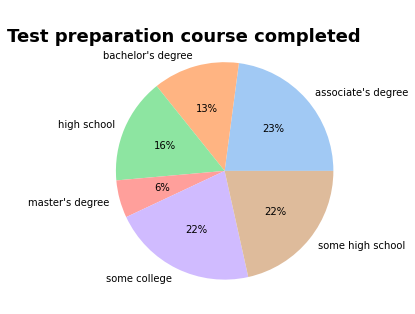

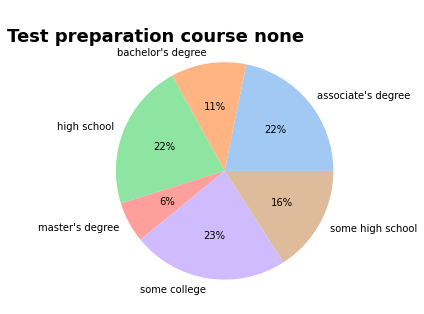

In [49]:
fig, ax = plt.subplots(figsize=(7,5))

subtitle = '''
Test preparation course completed
'''
ax.text(-2,1,subtitle,horizontalalignment='left',color='black',fontsize=18,fontweight='bold')

x = test_score[test_score['test preparation course']== 'completed']
colors = sns.color_palette('pastel')
plt.pie(x['count_education'], 
        labels=x['parental level of education'], colors=colors,
        autopct='%.0f%%')

fig, ax = plt.subplots(figsize=(7,5))
subtitle = '''
Test preparation course none
'''
ax.text(-2,1,subtitle,horizontalalignment='left',color='black',fontsize=18,fontweight='bold')

y = test_score[test_score['test preparation course']== 'none']
plt.pie(y['count_education'], 
        labels=y['parental level of education'], colors=colors,
        autopct='%.0f%%')

plt.show()

pada diagram menunjukan bahwa latar pendidikan orangtua **associate's degree** student yang mengikuti test preparation course memiliki **jumlah student lebih banyak dengan jumlah 82 dengan persentase 23 %** dari total murid yang mengikuti test preparation course

pada latar belakang orangtua **some college** memiliki **jumlah student yang lebih banyak dari total student yang tidak mengikuti test preparation course dengan jumlah 149 dengan persentase 23 %** dari total murid yang tidak mengikuti test preparation course

## 8. apakah ada pengaruh pada latar belakang pendidikan orangtua terhadap total score yang di raih?

untuk mengetahui pengaruh dari latar belakang pendidikan orangtua diperlukan beberapa tahapan diantaranya:

1. berapa nilai maximal, minimum dan rata-rata total score dari masing-masing latar belakang pendidikan orangtua student?
2. dari latarbelakang apa yang memiliki nilai tertinggi dan terendah pada ujian diberikan?
3. siapa yang memiliki rata-rata total nilai tertinggi dan terendah dari latarbelakang orang tua?


In [50]:
#nilai maximal, minimum dan rata-rata total score dari masing-masing latar belakang pendidikan orangtua student
education_score = student.groupby('parental level of education').agg(
    max_score = ('total score','max'),
    min_score = ('total score', 'min'),
    avg_score = ('total score', 'mean')
).reset_index()

education_score

,parental level of education,max_score,min_score,avg_score
0,associate's degree,300,95,208.707207
1,bachelor's degree,300,117,215.771186
2,high school,287,55,189.290816
3,master's degree,293,134,220.796610
4,some college,297,70,205.429204
5,some high school,297,27,195.324022


nilai tertinggi rata-rata pada master's degree memiliki nilai tertinggi dengan **rata-rata score 220,796**

nilai terendah rata-rata pada high school memiliki nilai terendah dengan **rata-rata score 189,290**